# Práctica Ipython
## Punto 1: insertion sort

Para esta práctica se utilizó la implementación del Cormen:

In [1]:
def insertionSort(n):
    j=1
    while j<len(n):
        llave=n[j]
        i=j-1
        while i>=0 and n[i]>llave:
            n[i+1]=n[i]
            i=i-1
        n[i+1]=llave
        j=j+1


Se generaron 3 listas, cada una con lóngitud 3, 4, y 5 respectivamente.

In [2]:
lista1 = range(4)
lista2 = range(5)
lista3 = range(6)
print lista1,lista2,lista3

[0, 1, 2, 3] [0, 1, 2, 3, 4] [0, 1, 2, 3, 4, 5]


In [3]:
def nope(i):
    aux = []
    for j in i:
        aux.append(j)
    return aux

La función 'tiempos' fue diseñada para obtener los tiempos que tardaba cada uno de los arreglos, con todas sus permutaciones posibles. Esta función retorna el tiempo del mejor caso, del caso promedio y del peor caso.

In [4]:
import time

def tiempos(permutacion):
    tiempoMedio = 0
    tpeorCaso = 0
    tmejorCaso = 0
    tam = 0
    insertionSort(lista1)
    for i in permutacion:
        aux = nope(i)
        tiempoInicial=time.clock()
        insertionSort(aux)
        tiempoFinal=time.clock()-tiempoInicial

        if nope(i) == sorted(aux):
            tmejorCaso = tiempoFinal
        elif nope(i) == sorted(aux, reverse=True):
            tpeorCaso = tiempoFinal
        else:
            tiempoMedio += tiempoFinal
            tam += 1

    tiempoMedio /= tam
    auxxx[0] = tmejorCaso
    auxxx[1] = tiempoMedio
    auxxx[2] = tpeorCaso
    return tmejorCaso, tiempoMedio,tpeorCaso

aux1 = [0,0,0]
aux2 = [0,0,0]
aux3 = [0,0,0]

auxxx = [0,0,0]
auxxx = [0,0,0]
auxxx = [0,0,0]

Se realizó el conteo de los tiempos 1000 veces para cada lista, para encontrar un tiempo promedio más exacto.

In [5]:
from itertools import permutations

for some in xrange(1000):
    permutaciones1 = permutations(lista1)
    permutaciones2 = permutations(lista2)
    permutaciones3 = permutations(lista3)

    tiempos(permutaciones1)
    for i in range(3):
        aux1[i] += auxxx[i]

    tiempos(permutaciones2)
    for i in range(3):
        aux2[i] += auxxx[i]

    tiempos(permutaciones3)
    for i in range(3):
        aux3[i] += auxxx[i]

mejores=[]
peores=[]
promedios=[]

mejores.append(aux1[0])
mejores.append(aux2[0])
mejores.append(aux3[0])
promedios.append(aux1[1])
promedios.append(aux2[1])
promedios.append(aux3[1])
peores.append(aux1[2])
peores.append(aux2[2])
peores.append(aux3[2])

print "mejores: ", mejores
print "promedios", promedios
print "peores", peores

mejores:  [0.0017127252365113418, 0.0020895904730994517, 0.0025407613827418897]
promedios [0.0025637136624360583, 0.0033168378311074485, 0.004236797889150134]
peores [0.0031347962382452486, 0.004161528217281484, 0.005496977688591429]


Al final se realizó la interpolación y la gráfica, usando las librerias de Ipython.

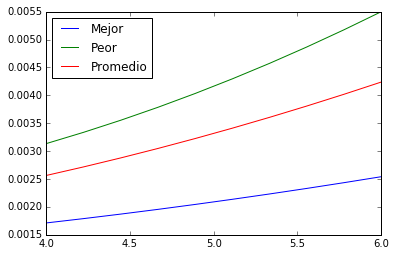

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math

x = np.linspace(4,6,3,endpoint=True)
x2 = np.linspace(4,6,10,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

#plt.plot(x,mejores,x,peores,x,promedios)
plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')